# Chapter14. Multiple Linear Regression

In [115]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
# 표본들이 dataframe 으로 구성될 수 있으면 statsmodels.formulas.api 를 이용하여 regression 할 수 있다.
from statsmodels import regression
import matplotlib.pyplot as plt

Multiple linear regression 은 여러개의 독립변수로 일반화한 함수이다.
종속변수 $Y$ 가 $X_1,\ldots, X_k$ 의 선형 함수라고 가정함.

$$ Y_i = \beta_0 + \beta_1 X_{1i} + \ldots + \beta_k X_{ki} + \epsilon_i $$

finance 에서는 위 공식을 다음과 같이 쓰기도 하는데 단지 변수명만 바뀌었을 뿐 model 은 동일하다.

$$ Y_i = \alpha + \beta_1 X_{1i} + \ldots + \beta_k X_{ki} + \epsilon_i $$

표본 $i = 1,2,\ldots, n$. hyperplane 을 찾아내어 best fit 하기 위해 OLS(Ordinary Least Squares) 방법을 사용하고, 예측값과 표본값 간의 squared error  $\sum_{i=1}^n \epsilon_i^2$.가 최소화 되도록 한다. 

***
#### Squared Error 설명 
Y 가 실제 data 값이라 하고, Y_hat 이 linear regression 으로 구한 예측값이라 하면 squared error 는 다음과 같이 계산된다.

In [117]:
Y = np.array([1, 3.5, 4, 8, 12])         # 실제값
Y_hat = np.array([1, 3, 5, 7, 9])       # 예측값

print('Error ' + str(Y_hat - Y))

SE = (Y_hat - Y) ** 2                      # squared error 계산

print('Squared Error : ' + str(SE))
print('Sum Squared Error : ' + str(np.sum(SE)))

Error [ 0.  -0.5  1.  -1.  -3. ]
Squared Error : [0.   0.25 1.   1.   9.  ]
Sum Squared Error : 11.25


일단 OLS 방법을 통해 regression 식의 coefficients 를 구하면, 새로운 관측값 $X$ 를 이용하여 $Y$ 값을 예측할 수 있다. 

각 coefficient $\beta_j$ 는 다른 종속변수를 상수로 간주할 때 $X_j$ 가 1 변하면 $Y_i$ 가 얼마나 변하는가를 나타낸다. 이 것은 linear regression 이라는 가정을 전제로 한다.

다음과 같이 인위적으로 $Y$, $X_1$, and $X_2$ 를 만들어 정확한 관계를 파악하는 것 부터 시작해 보겠다.

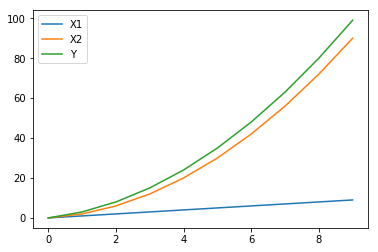

In [118]:
# simple linear curve of 1, 2, 3 구성
X1 = np.arange(10)

# 포물선을 만들고 X1 을 더한 것을 X2 라 하자.
X2 = np.array([i ** 2 for i in range(10)]) + X1

# X1 과 X2 를 단순히 더한 것을 Y 라 하면,
Y = X1 + X2

plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.plot(Y, label='Y')
plt.legend();

single linear regression 에서 사용했던 동일한 `statsmodels` 사용함.

In [121]:
X1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [122]:
X2

array([ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90])

In [123]:
sm.add_constant(np.column_stack((X1, X2)))

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  2.],
       [ 1.,  2.,  6.],
       [ 1.,  3., 12.],
       [ 1.,  4., 20.],
       [ 1.,  5., 30.],
       [ 1.,  6., 42.],
       [ 1.,  7., 56.],
       [ 1.,  8., 72.],
       [ 1.,  9., 90.]])

In [124]:
# numpy column_stack  을 사용하여 위에서 보듯 두개의 1-D array 를 2-D arrary 로 변환하고 intercept fit 을 위해 column of ones 추가
X = sm.add_constant( np.column_stack( (X1, X2) ) )

# Run the model
results = regression.linear_model.OLS(Y, X).fit()

print('Beta_0:', results.params[0])
print('Beta_1:', results.params[1])
print('Beta_2:', results.params[2])

Beta_0: -3.552713678800501e-15
Beta_1: 1.000000000000007
Beta_2: 0.999999999999998


In [126]:
results.params             # alpha, beta1, beta2

array([-3.55271368e-15,  1.00000000e+00,  1.00000000e+00])

위의 result 에서 $\alpha$ 는 0, $\beta_1$ 과 $\beta_2$ 는 1 이 구해졌으므로, $Y$ 는 다음과 같이 표현할 수 있다. 

$$ Y_{hat} = X_1 + X_2 = X_1 + X^2 + X_1 = 2 X_1 + X^2$$  

($X^2$ 은 포물선 이므로) 또는 $ Y_{hat} = 2X_1$ + 포물선.

그러나, $X_1$ 의 계수는 1 이다. 왜냐하면,  $X_1$ 이 1 변하면  $Y$ 가 1 변하기 때문이다. 반면 $X_2$ 는 상수로 간주한다.
Multiple linear regression 은 각 변수의 기여도를 분리한다. 

마찬가지로, 두 주식에 대한 linear regression 은 높은 $\beta$ 를 보일 수 있다. 그러나 제 3 의 주식 (예를 들어 SPY 와 같이 S&P 500 을 추종하는) 을 독립변수로 추가함으로서 앞선 두 주식간의 상관관계(correlation) 가 거의 S&P 500 과의 상관관계에 기인함을 발견할 수도 있다. 이것은 매우 유용할 수 있는데 두 주식간의 상관관계 보다는 S&P 500 과 두 주식간의 상관관계가 신뢰성게 예측되기 때문이다. 이 방법은 두 주식간의 유의성(significance) 을 측정할 수 있게해 주는데 이 문제는 confounding (혼재) 라고 알려져 있다.

이 것을 실제 주식에 검증하기 위해 임의의 두 종목과 S&P 500 index 를 선택하여 mutiple linear regressoin 을 수행해 보겠다.

In [131]:
# 두개의 임의로 선택한 자산과 index 를 선택
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2015-01-01')

param = {'q': "T", 'i': "86400", 'x': "NYSE", 'p': "10Y" }
df = pd.DataFrame(get_price_data(param))
df.index = df.index.date
df.index = pd.to_datetime(df.index)

asset1 = df['Close'].loc[start : end]

param= {'q': "FISV", 'i': "86400", 'x': "NASD", 'p': "10Y" }
df = pd.DataFrame(get_price_data(param))
df.index = df.index.date
df.index = pd.to_datetime(df.index)

asset2 = df['Close'].loc[start : end]

params_INDEX = [{'q': ".INX", 'x': "INDEXSP",}]
period = "10Y"
df = get_prices_data(params_INDEX , period)
df.index = pd.to_datetime(df.index)

benchmark = df['.INX_Close'].loc[start:end]

# 우선 2 개의 asset 간의 linear regression 수행
slr = regression.linear_model.OLS(asset1, sm.add_constant(asset2)).fit()
print('SLR alphe of asset2:', slr.params[0])
print('SLR beta of asset2:', slr.params[1])

SLR alphe of asset2: 32.661822641192806
SLR beta of asset2: 0.061975802556131554


asset1 을 종속변수로 하고 asset2 를 독립변수로 하는 simple linear regression 은 asset1 = 32 + 0.0619 * asset2 이다.

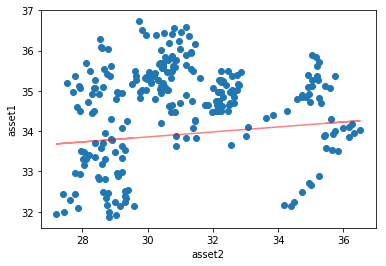

In [134]:
y_hat = 32 + 0.0619 * asset2
plt.scatter(asset2, asset1)
plt.plot(asset2, y_hat, 'r', alpha=0.5)
plt.xlabel('asset2')
plt.ylabel('asset1');

In [135]:
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.263
Date:                Fri, 20 Apr 2018   Prob (F-statistic):             0.0400
Time:                        19:28:41   Log-Likelihood:                -391.51
No. Observations:                 253   AIC:                             787.0
Df Residuals:                     251   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6618      0.935     34.943      0.000      30.821      34.503
Close          0.0620      0.030      2.065      0.040       0.003       0.121
==============================================================================
Omnibus:                       14.904   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.388
Skew:                          -0.568   Prob(JB):                     0.000455
Kurtosis:                       2.588   Cond. No.                         406.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 결과는 p-value 0.04 이므로 relation 있음.

이번에는 새로운 독립변수 benchmark 를 추가하여, asset1 을 종속변수로 하고, asset2 와 benchmark 가 독립변수인 MLR 을 수행한다.

In [138]:
# asset2 와 SPY 를 독립변수로로 multiple linear regression 수행
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((asset2, benchmark)))).fit()

prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2]*benchmark
prediction.name = 'Prediction'

print('MLR beta of asset2:', mlr.params[1], '\nMLR beta of S&P 500:', mlr.params[2])

MLR beta of asset2: -0.4796480041522151 
MLR beta of S&P 500: 0.017658163921868125


위의 분석을 수행한 다음 단계는 결과의 신뢰성 검토이다. 독립변수, 종속변수, 예측치 graph 의 이상 유무를 check 하는 것이 가장 간편하다.

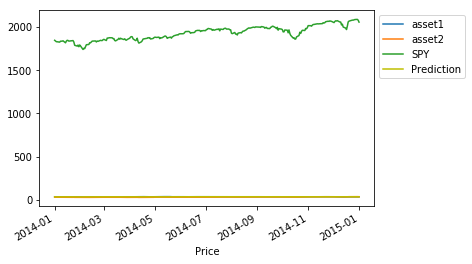

In [139]:
# MLR 에 의해 계산된 예측치와 3 개 변수를 plot 한다
asset1.plot(label='asset1')
asset2.plot(label='asset2')
benchmark.plot(label='SPY')
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend(bbox_to_anchor=(1,1), loc=2);

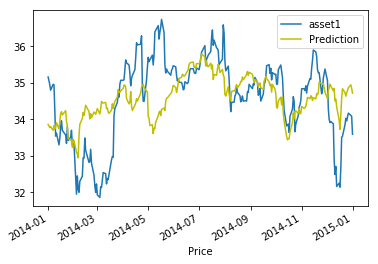

In [140]:
# 위의 그래프는 잘 구분이 되지 않으므로 종속변수와 예측치 만 그려본다
asset1.plot(label="asset1")
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend();

# 평가(Evaluation)

regression 에서 나온 결과에 따른 fit 에 대해 통계를 구할 수 있다. p-value(F-statitics) 가 <0.05 이므로 이 OLS 는 accept 된다.

In [141]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     40.79
Date:                Fri, 20 Apr 2018   Prob (F-statistic):           4.68e-16
Time:                        19:34:42   Log-Likelihood:                -357.92
No. Observations:                 253   AIC:                             721.8
Df Residuals:                     250   BIC:                             732.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3801      2.145      7.171      0.000      11.156      19.604
x1            -0.4796      0.067     -7.109      0.000      -0.613      -0.347
x2             0.0177      0.002      8.720      0.000       0.014       0.022
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.973
Skew:                          -0.107   Prob(JB):                        0.615
Kurtosis:                       3.215   Cond. No.                     6.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Assumptions

통계의 유효성은 linear regression 의 가정이 충족되었는가 여부에 달려있다. 그 가정들은 SLR 의 가정들과 같다 (Chapter 12 참조):

* 독립변수 X 는 random 하지 않음.
* error term(잔차항) 의 variance 가 전체 측정치에 걸쳐서 일정함. fit 를 하기위해 중요.
* error 는 자기상관관계 (autocorrelated) 없음. Durbin-Watson statistic 값이 2 에 가까우면 autocorrelation 없음.
* error 는 정규분포 되어있음. 그렇지 않으면 F-test 와 같은 통계를 사용할 수 없다.

Multiple linear regression 추가적으로 다음의 가정을 한다 :
* 독립변수 간에는 정확한 선형 관계가 없다. 그렇지 않으면 동일한 선형방적식이 여러 방식으로 표현되므로 계수 $\beta_i$ 를 단일값으로 풀 수 없다.

만약 독립변수간에 선형 관계가 존재한다면, 이 것을 covariance(공분산) 라고 부르고 그들 간에 linear combination(선형결합) 이라고 말한다.
이런 방식으로 상호 종속하는 경우 주어진 $X_i$ 에 대한 $\beta_i$ 계수는 부정확할 것이다. 

다음의 예를 보면 쉽게 이해된다. 여기서 $X_1$ 과 $X_2$ 는 100% 공분산 관계이다. 이 경우 linear regression 은 예측 능력에 영향 없이 총합계내에서 어떠한 조합의 coefficient 도 할당할 수 있다.

$$ 1X_1 + 0X_2 = 0.5X_1 + 0.5X_2 = 0X_1 + 1X_2 $$

계수를 특정할 수는 없어도 만약 독립변수들과 종속변수들간에 전체적인 fit 이 잘 맞으면 최종 모델은 정확할 수 있다. 종속성이 문제인 경우 모델 구축의 best practice 는 모델을 더 잘 맞게 만드는 변수들과 correlate 된 덜 descriptive 한 변수들을 생략하는 것이다. 이렇게 함으로써 $\beta_i$ 예측은 실제 값에 접근시키고 overfitting 은 줄일 수 있다.

regression model 이 필요 가정을 충족한다는 확인을 하면 fit 을 분석하기 위해 통계 report 를 마음 놓고 사용할 수 있다. 예를 들어 $R^2$ 값은  model 에 의해 설명되는 $Y$ 의 총 variation 의 분수값을 알려준다. 그러나, multiple linear regression 을 할 때 Adjusted $R^2$ 을 선호하는데 model 에 regresson 변수를 추가할 때 발생하는 $R^2$ 의 작은 증가를 보정해 주기 때문이다. 비록 그 것들이 종속변수에 유의성 있게 상관관계되지 않았더라도, Adjusted $R^2$ 는 다음과 같이 정의된다.

$$ 1 - (1 - R^2)\frac{n-1}{n-k-1} $$

여기서 $n$ 은 표본 숫자이고 $k$ 는 model 내의 독립변수의 숫자이다. 다른 유용한 통계는 F-statistic 과 예측의 standard error 이다.

# Model Selection 예제

종속변수들에 대한 best possible model 결정시에 여러가지 다른 방법이 있다. 너무 많은 원인변수(explanatory variable) 을 사용하면 model 에 대한 overfitting 위험이 있다. 그러나 너무 적게 사용하면 fit 이 아예 안될 수도 있다. 많이 사용되는 방법 중 하나는 단계별 regression 이다.
Forward stepwise regression 은 empty model 에서 시작하여 개별 변수를 테스트 하고,  best model quality 를 보인 것을 선택한다. 대개  AIC 나 BIC 를 테스트 한다 (lowest is best).  매 스텝마다 AIC 혹은 BIC 를 계산하며 나머지 변수들을 원인변수의 결합을 한스텝에 하나씩 추가해 나간다.
Regression 최종 단계에서 best quality model 이 선택되고 final best model 로 제시된다. 한계점은 모든 가능한 combination 을 test 하지는 않으므로 특정 변수가 일찍 제외될 경우 이론상 best model 을 놓칠 수 있다는 것이다. 그러므로 sepwise regression 은 model 에 대한 스스로의 최적 판단과 조합하여 이용해야 한다.

이를 테스트하기 위해 다음과 같이 인위적으로 4 개의 correlate 된 변수를 만들어 보자.

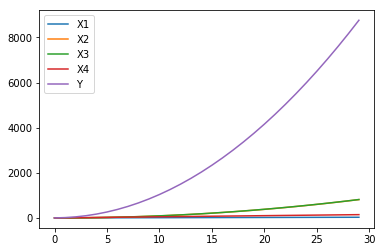

In [150]:
X1 = np.arange(30)
X2 = [i**2 for i in range(30)] - X1
X3 = [np.log(i) for i in range(1, 31)] + X2
X4 = 5 * X1
Y = 2 * X1 + 0.5 * X2 + 10 * X3 + X4

plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.plot(X3, label='X3')
plt.plot(X4, label='X4')
plt.plot(Y, label='Y')
plt.legend();

In [151]:
results = regression.linear_model.OLS(Y, sm.add_constant(np.column_stack((X1,X2,X3,X4)))).fit()

print("Beta_0: ", results.params[0])
print("Beta_1: ", results.params[1])
print("Beta_2: ", results.params[2])
print("Beta_3: ", results.params[3])
print("Beta_4: ", results.params[4])

Beta_0:  -1.3731605693438013e-12
Beta_1:  0.2692307692307718
Beta_2:  0.4999999999987495
Beta_3:  10.000000000001059
Beta_4:  1.3461538461538538


서로 correlate 된 4 개의 변수를 단순히 MLR 을 하면 $Y_{hat} =  0.2 X1 + 0.5 X2 + 9.9 X3 + 1.34 X4$ 의 regression 식이 나온다.
그래프는 실제값 Y 와 정확히 일치한다.

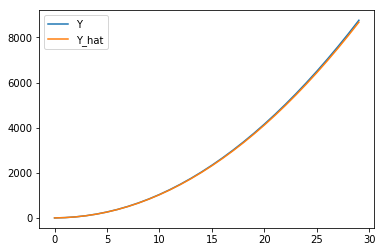

In [152]:
Y_hat = 0.2 * X1 + 0.5 * X2 + 9.9 * X3 + 1.34 * X4 

plt.plot(Y, label='Y')
plt.plot(Y_hat, label='Y_hat')
plt.legend();

forward stepwise regression 을 적용해 보겠다.

In [153]:
data = pd.DataFrame(np.column_stack((X1,X2,X3,X4)), columns = ['X1','X2','X3','X4'])
response = pd.Series(Y, name='Y')

In [154]:
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model

In [155]:
result = forward_aic(Y, data)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.270e+29
Date:                Fri, 20 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:52:02   Log-Likelihood:                 693.17
No. Observations:                  30   AIC:                            -1378.
Df Residuals:                      26   BIC:                            -1373.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.393e-12   2.08e-11     -0.163      0.871   -4.61e-11    3.93e-11
X3            10.0000   2.66e-11   3.76e+11      0.000      10.000      10.000
X1             7.0000   5.82e-12    1.2e+12      0.000       7.000       7.000
X2             0.5000   2.65e-11   1.89e+10      0.000       0.500       0.500
==============================================================================
Omnibus:                        3.712   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.196
Skew:                          -0.714   Prob(JB):                        0.202
Kurtosis:                       2.281   Cond. No.                     4.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model 구축에 있어서,  $X_4$ 항은  $X1$ 항과 매우 가깝게 관계되어 있다 (단순히 스칼라 곱). 그러나 stepwise regression 은 이를 알아채지 못하고 변수를 remove 한 뒤  $X_1$ 항의 계수를 보정해 주었다. 우리의 결정은 $X_4$ 항을 model 에서 제외하는 것이고 stepwise regression 의 한계를 보여주고 있다. model 의 건전성을 처방하는 다른 방법도 있는고 개별 변수들에게 다른 정도의 penalty 를 주는 더 복잡한 model 이다.